Avaliação de Desempenho do Modelo Através de Engenharia de Features


Utilização do k-Nearest Neighbor para verificar o desempenho do algoritmo de acordo com a engenharia de features empregada.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

# Carregando o conjunto de dados
data = pd.read_csv("/datasets/ionosphere.data", header = None)

data

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g


In [ ]:
# Separando os dados de entrada (features) e o alvo (target)
X = data.iloc[:, :-1]  # Todas as colunas, exceto a última
y = data.iloc[:, -1]   # A última coluna

# Mapeando 'b' para 0 e 'g' para 1 na coluna target
y = y.map({'b': 0, 'g': 1})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [ ]:
# Definicao do numero de vizinhos de forma arbitraria
k = 5

In [ ]:
# Criacao do modelo
knn = KNeighborsClassifier(k)

# Treinamento do modelo
knn.fit(X_train,y_train)

# Teste
y_pred = knn.predict(X_test)

acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Imprimindo as métricas
print(f'Acurácia: {acc:.2f}')
print("Resultado acurácia em %:", round(acc,2)*100)
print(f'Precisão: {precision:.2f}')
print("Resultado precisão em %:", round(precision,2)*100)
print(f'Recall: {recall:.2f}')
print("Resultado Recall em %:", round(recall,2)*100)
print(f'F1-Score: {f1:.2f}')
print("Resultado F1-Score em %:", round(f1,2)*100)


Acurácia: 0.84
Resultado acurácia em %: 84.0
Precisão: 0.80
Resultado precisão em %: 80.0
Recall: 0.97
Resultado Recall em %: 97.0
F1-Score: 0.88
Resultado F1-Score em %: 88.0


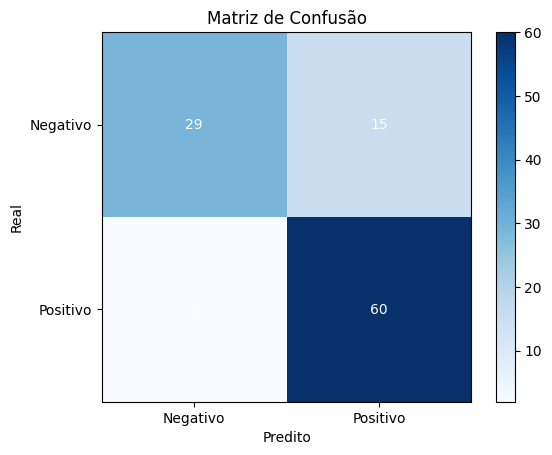

In [ ]:
# plota matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
plt.imshow(conf_matrix, cmap = 'Blues', interpolation = 'nearest')
plt.title('Matriz de Confusão')
plt.colorbar()
plt.xticks([0, 1], ['Negativo', 'Positivo'])
plt.yticks([0, 1], ['Negativo', 'Positivo'])
plt.xlabel('Predito')
plt.ylabel('Real')
for i, j in np.ndindex(conf_matrix.shape):
    plt.text(j, i, conf_matrix[i, j], ha='center', va='center', color='white')
plt.show()

**Repetindo todo o processo utilizando o método de Seleção de Features por limiar de variância, considerando o limiar de 35%**

In [ ]:
# Carregando o conjunto de dados
data = pd.read_csv("/datasets/ionosphere.data", encoding='utf8', header=None)


  *  Aplicando  método de **Seleção de Features por limiar de variância**.


In [ ]:
# Separando os dados de entrada (features) e o alvo (target)
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Mapeando 'b' para 0 e 'g' para 1 na coluna target
y = y.map({'b': 0, 'g': 1})

# Estabelecendo o limiar de variância
limiar_de_variancia = 0.35

# Criando o modelo de seleção de features
selecao = VarianceThreshold(threshold=limiar_de_variancia)

# Selecionando as features
features_selecionadas = selecao.fit_transform(X)

print("Formato dos dados Originais:", np.shape(X))
print("Formato dos dados após a seleção de features:", np.shape(features_selecionadas))

X_train, X_test, y_train, y_test = train_test_split(features_selecionadas, y, test_size=0.3, random_state=0)

Formato dos dados Originais: (351, 34)
Formato dos dados após a seleção de features: (351, 6)


In [ ]:
# Definicao do numero de vizinhos de forma arbitraria
k = 5

In [ ]:
# Criacao do modelo
knn = KNeighborsClassifier(k)

# Treinamento do modelo
knn.fit(X_train,y_train)

# Teste
y_pred = knn.predict(X_test)

# Métricas
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Imprimindo as métricas
print(f'Acurácia: {acc:.2f}')
print("Resultado acurácia em %:", round(acc,2)*100)
print(f'Precisão: {precision:.2f}')
print("Resultado precisão em %:", round(precision,2)*100)
print(f'Recall: {recall:.2f}')
print("Resultado Recall em %:", round(recall,2)*100)
print(f'F1-Score: {f1:.2f}')
print("Resultado F1-Score em %:", round(f1,2)*100)

Acurácia: 0.81
Resultado acurácia em %: 81.0
Precisão: 0.78
Resultado precisão em %: 78.0
Recall: 0.95
Resultado Recall em %: 95.0
F1-Score: 0.86
Resultado F1-Score em %: 86.0


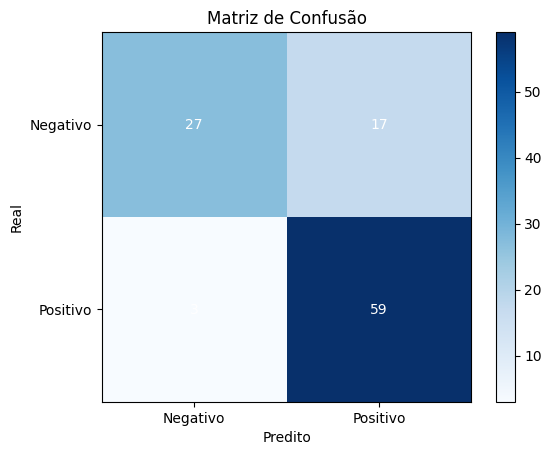

In [ ]:
# plota matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
plt.imshow(conf_matrix, cmap = 'Blues', interpolation = 'nearest')
plt.title('Matriz de Confusão')
plt.colorbar()
plt.xticks([0, 1], ['Negativo', 'Positivo'])
plt.yticks([0, 1], ['Negativo', 'Positivo'])
plt.xlabel('Predito')
plt.ylabel('Real')
for i, j in np.ndindex(conf_matrix.shape):
    plt.text(j, i, conf_matrix[i, j], ha='center', va='center', color='white')
plt.show()

**Repindo todo o processo utilizando o método de Extração de Features por Análise de Componentes Principais (PCA), considerando a porcentagem de informação a ser mantida no prolema de 85%.**

In [ ]:
# Carregando o conjunto de dados
data = pd.read_csv("/datasets/ionosphere.data", encoding='utf8', header=None)

*  Aplicando método de **Extração de Features por Análise de Componentes Principais (PCA).**


In [ ]:
# Separando os dados de entrada (features) e o alvo (target)
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Mapeando 'b' para 0 e 'g' para 1 na coluna target
y = y.map({'b': 0, 'g': 1})

# Criando o modelo através de um número definido de componentes principais
pca = PCA(n_components = 0.85)

# Aplicando a PCA
P = pca.fit_transform(X)

print(P)

X_train, X_test, y_train, y_test = train_test_split(P, y, test_size=0.3, random_state=0)

[[-8.59332860e-01 -9.61406757e-01 -5.86082357e-01 ... -2.20153653e-01
  -5.97801527e-02  2.20999195e-01]
 [ 7.65524410e-01 -1.06271411e+00 -1.39733865e+00 ... -3.10716437e-01
   4.21973385e-02  3.73263689e-01]
 [-1.11681736e+00 -3.92255939e-01  7.98828031e-03 ...  5.08177609e-03
  -1.26084501e-01  7.63168548e-02]
 ...
 [-2.00968648e+00  7.02142791e-03  3.45603502e-01 ...  2.02097514e-02
   1.44435820e-03 -2.71935018e-02]
 [-1.87850608e+00 -2.58263391e-01  2.79973413e-01 ... -4.80431587e-03
  -9.00198385e-02 -5.09193423e-02]
 [-1.54878315e+00 -1.87526433e-01  2.17570815e-01 ...  1.00494072e-01
  -1.09900783e-01  3.83997994e-02]]


In [ ]:
# Definicao do numero de vizinhos de forma arbitraria
k = 5

In [ ]:
# Criacao do modelo
knn = KNeighborsClassifier(k)

# Treinamento do modelo
knn.fit(X_train,y_train)

# Teste
y_pred = knn.predict(X_test)

# Métricas
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Imprimindo as métricas
print(f'Acurácia: {acc:.2f}')
print("Resultado acurácia em %:", round(acc,2)*100)
print(f'Precisão: {precision:.2f}')
print("Resultado precisão em %:", round(precision,2)*100)
print(f'Recall: {recall:.2f}')
print("Resultado Recall em %:", round(recall,2)*100)
print(f'F1-Score: {f1:.2f}')
print("Resultado F1-Score em %:", round(f1,2)*100)

Acurácia: 0.87
Resultado acurácia em %: 87.0
Precisão: 0.83
Resultado precisão em %: 83.0
Recall: 0.97
Resultado Recall em %: 97.0
F1-Score: 0.90
Resultado F1-Score em %: 90.0


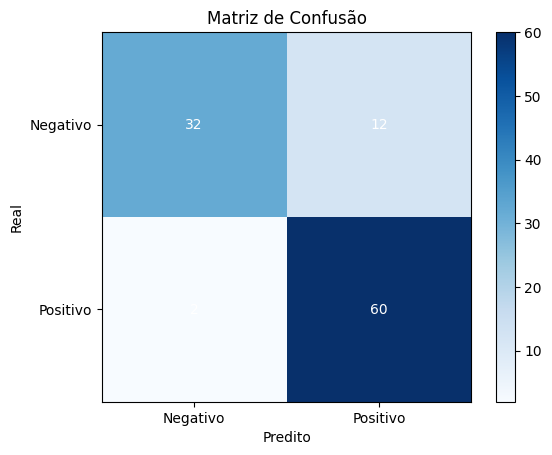

In [ ]:
# plota matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
plt.imshow(conf_matrix, cmap = 'Blues', interpolation = 'nearest')
plt.title('Matriz de Confusão')
plt.colorbar()
plt.xticks([0, 1], ['Negativo', 'Positivo'])
plt.yticks([0, 1], ['Negativo', 'Positivo'])
plt.xlabel('Predito')
plt.ylabel('Real')
for i, j in np.ndindex(conf_matrix.shape):
    plt.text(j, i, conf_matrix[i, j], ha='center', va='center', color='white')
plt.show()

**Comparação dos resultados obtidos**

A quantidade de informações mantidas no conjunto de dados, por meio das abordagens de engenharia de features, tem um impacto direto no desempenho do modelo. Isso significa que essas abordagens podem tanto melhorar quanto piorar o desempenho do modelo, dependendo do que é definido em termos de quais características são mantidas ou extraídas.

Em relação a **Seleção de Features por Limiar de Variância**, por manter apenas as características que têm uma variância acima de um limiar especificado, pode ser útil para eliminar características com pouca variação, que podem não contribuir significativamente para a tarefa de classificação. Ela é  é especialmente útil quando se suspeita que algumas características não são informativas para a tarefa de classificação, e sua remoção pode melhorar o desempenho do modelo. No entanto, deve ser usada com cautela, pois a escolha inadequada do limiar pode resultar na perda de informações relevantes.

 - Ao utilizarmos este método, notamos uma queda no desempenho do modelo, que pode ter ocorrido justamente pela perda de características importantes no processo devido ao limiar escolhido.

Já em relação a **Extração de Features por Análise de Componentes Principais (PCA)**, busca representar as características originais em um novo espaço de características de menor dimensão. Ele  reduz a complexidade do modelo, mantendo a maior parte da variância dos dados.

 - Já ao utilizarmos este método, observamos que o modelo teve um desempenho melhor, que pode ser atribuido justamente pela presenvação da variância de dados. Desta forma, reduziu a dimensionalidade enquanto tentou manter uma quantidade significativa de informação, ajudado a remover redundâncias nos dados e melhorar a generalização do modelo. Ressaltando ainda que apesar da porcentagem de variância indicada na literatura ser 95% a 99% e termos utilizado 85%.